# Aula 05 - CNNs

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Redes Neurais Convolucionais (CNN);
- Convoluções;
- _Pooling_;
- Exercícios.

##   

# Redes Neurais Convolucionais (CNN)

As Redes Neurais Convolucionais são um ti´po de arquitetura específica para a análise de __imagens__, sendo um braço forte para modelos de __visão computacional__. As principais diferenças entre uma rede neural tradicional e uma CNN são dois tipos de camadas: as __convoluções__ e a __subamostragem (pooling)__.

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=600>


## Convoluções

As convoluções têm como objetivo destacar elementos nas imagens que forem relevantes utilizando da aplicação de filtros. A forma como o filtro funciona seria como uma transformação matemática entre matrizes:

<img src="https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif" width=500>

Com esses filtros, consegue-se criar os chamados __features maps__ ou mapas de atributo, que seria novas imagens destaques em determinados pontos da imagem de acordo com os filtros a serem aplicados:

<img src="https://miro.medium.com/max/875/1*ixuhX9vaf1kUQTWicVYiyg.png" width=900>

## Pooling

A camada de _Pooling_ ou também chamada de Subamostragem, ajuda a selecionar os principais elementos de uma imagem garantindo que seja representativo da imagem de origem. Então determinada uma janela de aplicação da subamostragem, o modelo percorre toda imagem aplicando algum tipo de agregação, como por exemplo média, máximo ou mesmo soma:

<img src="https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width=600>

<img src="https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-1/_/attachment/inline/e60e56a6-8bcd-4b61-880d-7c621e2cb1d5:6595a68471ed37621734130ca2cb7997a1502a2b/Pooling.gif" width=600>

A Aplicação do _Pooling_ auxilia na rede no sentido de manter determinados pontos relevantes da imagem, mas auxilia ao mesmo tempo a generalizar para as demais imagens.

<img src = "https://www.bouvet.no/bouvet-deler/understanding-convolutional-neural-networks-part-2/_/attachment/inline/607c9f97-d102-4025-9d6d-4149831f1bc2:7486b2c8566539842998faeec3cd28d2d0aa5360/Screenshot%202019-07-01%20at%2019.43.59.png" width=800>


Notem que fazer esses processos envolvem sempre redução do tamanho ou da qualidade da imagem, mas podemos evitar esse tipo de efeito utilizando de duas técnicas auxiliares que são o __zero-padding__ e o __stride__

<br><br>

- _Zero-Padding_: Consiste em adicionar uma camada de zeros ao redor da imagem com o intuito de preservar o tamanho da imagem antes da convoluções ou subamostragem e sem acrescentar viés a transformação:

<img src = "https://deeplizard.com/assets/jpg/2b25a0c1.jpg" width=800>

- _Stride_: Consiste em determinar "saltos" durante a aplicação das janelas de filtros, sendo esses saltos tanto na vertical quanto na horizontal:

<img src = "https://miro.medium.com/max/1400/1*4wZt9G7W7CchZO-5rVxl5g@2x.gif" width=600>

## 

##  Exemplo - Fashion MNIST

Vamos revisitar o exercício do MNIST utilizando agora de uma CNN para avaliar as imagens:

In [1]:
# TensorFlow e tf.keras
import tensorflow
import keras

# Bibliotecas Auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2022-09-30 19:51:58.808771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Baixando a nossa base de dados

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [12]:
# Olhando os shapes
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [13]:
# Olhando a target
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Pré-Processamento dos Dados

In [14]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
train_images = train_images / 255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
test_images = test_images/255.0

In [15]:
# Montar uma CNN
# 1 camada de convolução com 32 filtros e filtros com 3x3, ativação relu
# 1 camada MaxPooling com janela de 2x2
# Camada Flatten
# 1 camada dense com 100 neuronios e ativação relu
# camada de saída com 10 neurônios e ativação softmax


# Montar as camadas
cnn = keras.Sequential([
      keras.layers.Conv2D(32,                         # numero de filtros
                          (3,3),                      # dimensão do filtro
                          activation = 'relu',        # função de ativação
                          input_shape = (28, 28, 1)), # tamanho da entrada
      keras.layers.MaxPooling2D((2, 2)), # tamanho da janela
      keras.layers.Flatten(),            # Vetoriza as matrizes
      # Parte MLP
      keras.layers.Dense(100, activation = 'relu'),
      keras.layers.Dense(10, activation = 'softmax')
])

2022-09-30 19:58:29.271711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Crie um compile() com os seguintes parametros:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

# Crie o summary() para o modelo
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [18]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
cnn.fit(train_images,
        train_labels,
        epochs = 10)

Epoch 1/10
  13/1875 [..............................] - ETA: 17s - loss: 0.3842 - accuracy: 0.8317

2022-09-30 20:00:44.226469: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.4035 - accuracy: 0.8557
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3885 - accuracy: 0.8608
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3779 - accuracy: 0.8647
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3680 - accuracy: 0.8683
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3604 - accuracy: 0.8703
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3526 - accuracy: 0.8729
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3451 - accuracy: 0.8754
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3375 - accuracy: 0.8772
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3318 - accuracy: 0.8795
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3241

In [19]:
# crie o pred_labels usando a função predict_classes para o test_images
pred_labels = np.argmax(cnn.predict(test_images), axis = -1)

313/313 [==============================] - 2s 5ms/step


In [20]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Faça o print do classification_report para pred_labels e test_labels
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       957
           1       0.96      0.99      0.98       967
           2       0.84      0.73      0.78      1157
           3       0.93      0.79      0.85      1182
           4       0.68      0.84      0.75       810
           5       0.97      0.96      0.96      1015
           6       0.61      0.71      0.66       855
           7       0.95      0.93      0.94      1025
           8       0.98      0.92      0.95      1069
           9       0.94      0.98      0.96       963

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.87     10000



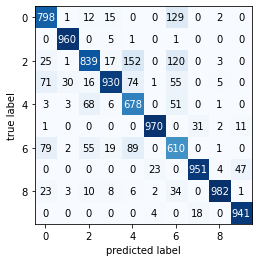

In [21]:
# Crie a matriz de confusão para o pred_labels e test_labels
cm = confusion_matrix(pred_labels, test_labels)
plot_confusion_matrix(conf_mat = cm)
plt.show()

## 

## Exercícios

__1)__ Desenvolva uma rede CNN para a base MNIST de classificação de dígitos, seguindo os passos abaixo:
- Carregue os dados segundo a função dada em aula, utilize os dados de teste como dados em __produção__, ou seja iremos usar em um outro momento;
- Nomeie os dados de treino como X e faça as seguintes separações: X em treino e teste (90/10%) e depois o X de treino em treino e validação (80/20%);
- Monte uma CNN;
- Faça as predições, avalie overfitting e salve o modelo final e os dados de produção;
- Carregue o modelo treinado e os dados de produção, e faça as novas predições.

In [22]:
import seaborn as sns

In [23]:
titanic = sns.load_dataset("titanic")

In [24]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

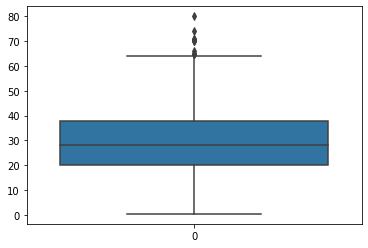

In [28]:
sns.boxplot(titanic['age'])

In [31]:
titanic.std()

/tmp/ipykernel_3001/4084194749.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.std()


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64